# Cyber Defense Dataset (CSE-CIC-IDS2018) Analysis


A Realistic Cyber Defense Dataset (CSE-CIC-IDS2018) was accessed on 2024-06-18 from https://registry.opendata.aws/cse-cic-ids2018.

### 1.0 Set-up

In [4]:
import pandas as pd
import numpy as np

In [5]:
pd.set_option("display.max_columns", None)  # or 1000
pd.set_option("display.max_rows", None)  # or 1000

In [3]:
!aws s3 ls --no-sign-request s3://cse-cic-ids2018/

                           PRE Original Network Traffic and Log data/
                           PRE Processed Traffic Data for ML Algorithms/


In [4]:
import subprocess
output = subprocess.check_output('aws s3 ls --no-sign-request "s3://cse-cic-ids2018/Processed Traffic Data for ML Algorithms/"', shell=True).decode('utf-8')

# Split the output by newline character
lines = output.split('\n')

# Iterate over each line and print the file size in GB
for line in lines:
    if line:
        file_info = line.split()
        if len(file_info) >= 4:  # Check if file_info has at least 4 elements
            file_size = int(file_info[2])
            file_size_gb = file_size / (1024**3)  # Convert bytes to GB
            print(f"File: {file_info[3]}, Size: {file_size_gb:.2f} GB")


File: Friday-02-03-2018_TrafficForML_CICFlowMeter.csv, Size: 0.33 GB
File: Friday-16-02-2018_TrafficForML_CICFlowMeter.csv, Size: 0.31 GB
File: Friday-23-02-2018_TrafficForML_CICFlowMeter.csv, Size: 0.36 GB
File: Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv, Size: 3.78 GB
File: Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv, Size: 0.10 GB
File: Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv, Size: 0.35 GB
File: Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv, Size: 0.36 GB
File: Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv, Size: 0.33 GB
File: Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv, Size: 0.31 GB
File: Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv, Size: 0.19 GB


In [6]:
import io
import boto3
from botocore.config import Config
from botocore import UNSIGNED


client = boto3.client('s3', config=Config(signature_version=UNSIGNED))
cyber_bucket = 'cse-cic-ids2018'
cyber_prefix = f'Processed Traffic Data for ML Algorithms'

obj = client.get_object(Bucket= cyber_bucket , Key = cyber_prefix + '/' + 'Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv')
df = pd.read_csv(io.BytesIO(obj['Body'].read()), encoding='utf8')

### 2.0 Data analysis

#### 2.1 Data exploration

In [7]:
df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,15/02/2018 08:25:18,112641158,3,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.026633,56320579.00,7.042784e+02,56321077,56320081,112641158,5.632058e+07,7.042784e+02,56321077,56320081,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,0.026633,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0.0,0.000000,0.000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.000000,0,0,56320579.0,7.042784e+02,56321077,56320081,Benign
1,22,6,15/02/2018 08:29:05,37366762,14,12,2168,2993,712,0,154.857143,254.855270,976,0,249.416667,395.929392,138.117400,0.695806,1494670.48,3.894924e+06,15617415,7,37366762,2.874366e+06,5.104444e+06,15617415,40,37366730,3.396975e+06,5.564224e+06,15936762,893,0,0,0,0,456,416,0.374665,0.321141,0,976,191.148148,320.122898,102478.669516,0,0,0,1,0,0,0,0,0,198.5,154.857143,249.416667,0,0,0,0,0,0,14,2168,12,2993,29200,232,8,32,1024353.0,649038.754495,1601183,321569,11431221.0,3.644991e+06,15617415,8960247,Benign
2,47514,6,15/02/2018 08:29:42,543,2,0,64,0,64,0,32.000000,45.254834,0,0,0.000000,0.000000,117863.720074,3683.241252,543.00,0.000000e+00,543,543,543,5.430000e+02,0.000000e+00,543,543,0,0.000000e+00,0.000000e+00,0,0,1,0,0,0,64,0,3683.241252,0.000000,0,64,42.666667,36.950417,1365.333333,0,1,0,0,1,0,0,0,0,64.0,32.000000,0.000000,0,0,0,0,0,0,2,64,0,0,244,-1,0,32,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,Benign
3,0,0,15/02/2018 08:28:07,112640703,3,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.026633,56320351.50,3.669884e+02,56320611,56320092,112640703,5.632035e+07,3.669884e+02,56320611,56320092,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,0.026633,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0.0,0.000000,0.000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.000000,0,0,56320351.5,3.669884e+02,56320611,56320092,Benign
4,0,0,15/02/2018 08:30:56,112640874,3,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.026633,56320437.00,7.198347e+02,56320946,56319928,112640874,5.632044e+07,7.198347e+02,56320946,56319928,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,0.026633,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0.0,0.000000,0.000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.000000,0,0,56320437.0,7.198347e+02,56320946,56319928,Benign


In [8]:
df.shape

(1048575, 80)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  int64  
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std    1048575 non-n

In [10]:
# show number of unique values
df.nunique().sort_values(ascending=False)

Flow Byts/s          542155
Flow Pkts/s          501270
Flow IAT Mean        501083
Fwd Pkts/s           498247
Flow Duration        483970
Flow IAT Std         464613
Fwd IAT Mean         444703
Fwd IAT Tot          434593
Bwd Pkts/s           415147
Flow IAT Max         392002
Fwd IAT Max          377347
Fwd IAT Std          353644
Bwd IAT Mean         335604
Bwd IAT Tot          329725
Bwd IAT Std          325005
Bwd IAT Max          262596
Idle Mean            153947
Fwd IAT Min          148883
Idle Min             134473
Idle Max             125263
Bwd IAT Min          124886
Active Mean          123378
Active Max           118060
Flow IAT Min         116630
Idle Std              99359
Active Std            93199
Pkt Len Var           72103
Pkt Len Std           71873
Active Min            67836
Pkt Len Mean          56964
Pkt Size Avg          56423
Fwd Pkt Len Std       46964
Bwd Pkt Len Std       46792
Bwd Pkt Len Mean      38049
Bwd Seg Size Avg      38048
Timestamp           

In [11]:
# show missing values
df.isnull().sum().sort_values(ascending=False)

Flow Byts/s          4921
Dst Port                0
Bwd Byts/b Avg          0
Fwd Pkts/b Avg          0
Fwd Byts/b Avg          0
Bwd Seg Size Avg        0
Fwd Seg Size Avg        0
Pkt Size Avg            0
Down/Up Ratio           0
ECE Flag Cnt            0
CWE Flag Count          0
URG Flag Cnt            0
ACK Flag Cnt            0
PSH Flag Cnt            0
RST Flag Cnt            0
SYN Flag Cnt            0
FIN Flag Cnt            0
Pkt Len Var             0
Pkt Len Std             0
Fwd Blk Rate Avg        0
Bwd Pkts/b Avg          0
Pkt Len Max             0
Active Mean             0
Idle Min                0
Idle Max                0
Idle Std                0
Idle Mean               0
Active Min              0
Active Max              0
Active Std              0
Fwd Seg Size Min        0
Bwd Blk Rate Avg        0
Fwd Act Data Pkts       0
Init Bwd Win Byts       0
Init Fwd Win Byts       0
Subflow Bwd Byts        0
Subflow Bwd Pkts        0
Subflow Fwd Byts        0
Subflow Fwd 

In [12]:
print(f'Flow Byts/s column contains {4921/(df.shape[0])*100:.2f}% missing values')


Flow Byts/s column contains 0.47% missing values


In [13]:
df.duplicated().sum()

2421

In [14]:
# remove duplicates
df.drop_duplicates(inplace=True)

In [15]:
# create dataframe of only object type columns
df_obj = df.select_dtypes(include=['object'])

In [16]:
df_obj.shape

(1046154, 2)

In [17]:
df_obj.head()

,Timestamp,Label
0,15/02/2018 08:25:18,Benign
1,15/02/2018 08:29:05,Benign
2,15/02/2018 08:29:42,Benign
3,15/02/2018 08:28:07,Benign
4,15/02/2018 08:30:56,Benign


In [18]:
# create dataframe of int type columns
df_int = df.select_dtypes(include=['int64'])


In [19]:
df_int.shape

(1046154, 54)

In [20]:
df_int.nunique().sort_values(ascending=False)

Flow Duration        483970
Fwd IAT Tot          434593
Flow IAT Max         392002
Fwd IAT Max          377347
Bwd IAT Tot          329725
Bwd IAT Max          262596
Fwd IAT Min          148883
Idle Min             134473
Idle Max             125263
Bwd IAT Min          124886
Active Max           118060
Flow IAT Min         116630
Active Min            67836
TotLen Bwd Pkts       22673
Subflow Bwd Byts      22673
Dst Port              21732
Subflow Fwd Byts       7717
TotLen Fwd Pkts        7717
Init Bwd Win Byts      5123
Init Fwd Win Byts      4493
Bwd Header Len         2329
Fwd Pkt Len Max        1450
Fwd Header Len         1364
Pkt Len Max            1352
Subflow Bwd Pkts       1189
Tot Bwd Pkts           1189
Bwd Pkt Len Max        1172
Subflow Fwd Pkts        694
Tot Fwd Pkts            694
Bwd Pkt Len Min         286
Fwd Pkt Len Min         142
Fwd Act Data Pkts       138
Pkt Len Min              92
Down/Up Ratio            48
Fwd Seg Size Min         11
Protocol            

In [21]:
df_int.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Bwd Pkt Len Max,Bwd Pkt Len Min,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Pkt Len Min,Pkt Len Max,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Max,Active Min,Idle Max,Idle Min
0,0,0,112641158,3,0,0,0,0,0,0,0,56321077,56320081,112641158,56321077,56320081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0,0,56321077,56320081
1,22,6,37366762,14,12,2168,2993,712,0,976,0,15617415,7,37366762,15617415,40,37366730,15936762,893,0,0,0,0,456,416,0,976,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,14,2168,12,2993,29200,232,8,32,1601183,321569,15617415,8960247
2,47514,6,543,2,0,64,0,64,0,0,0,543,543,543,543,543,0,0,0,1,0,0,0,64,0,0,64,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,2,64,0,0,244,-1,0,32,0,0,0,0
3,0,0,112640703,3,0,0,0,0,0,0,0,56320611,56320092,112640703,56320611,56320092,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0,0,56320611,56320092
4,0,0,112640874,3,0,0,0,0,0,0,0,56320946,56319928,112640874,56320946,56319928,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0,0,56320946,56319928


In [22]:
df_int.describe()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Bwd Pkt Len Max,Bwd Pkt Len Min,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Pkt Len Min,Pkt Len Max,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Max,Active Min,Idle Max,Idle Min
count,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1046154.0,1046154.0,1046154.0,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1046154.0,1.046154e+06,1.046154e+06,1046154.0,1046154.0,1046154.0,1046154.0,1046154.0,1046154.0,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06
mean,7.409405e+03,9.525835e+00,1.432330e+07,5.153861e+00,6.433734e+00,4.364230e+02,4.937278e+03,1.517806e+02,1.400303e+01,3.312669e+02,3.372319e+01,6.775663e+06,2.368666e+06,1.383920e+07,6.446473e+06,2.786046e+06,1.004852e+07,3.663818e+06,6.335323e+05,5.068087e-02,0.0,0.0,0.0,1.058660e+02,1.348046e+02,1.383639e+01,3.409808e+02,5.861470e-03,5.068087e-02,6.112771e-02,3.643173e-01,2.840662e-01,4.792220e-02,0.0,6.112580e-02,5.763415e-01,0.0,0.0,0.0,0.0,0.0,0.0,5.153861e+00,4.364230e+02,6.433734e+00,4.937278e+03,5.232525e+03,5.613158e+03,1.886451e+00,1.657487e+01,1.822155e+05,8.339778e+04,4.610202e+06,4.101621e+06
std,1.755545e+04,5.306853e+00,3.336758e+07,3.383789e+01,9.797554e+01,2.884665e+04,1.401090e+05,2.776598e+02,2.384281e+01,4.941869e+02,5.572713e+01,1.727600e+07,1.102523e+07,3.328788e+07,1.713737e+07,1.251058e+07,2.944444e+07,1.274038e+07,6.291098e+06,2.193453e-01,0.0,0.0,0.0,7.922755e+02,1.965060e+03,2.252905e+01,5.130876e+02,7.633556e-02,2.193453e-01,2.395645e-01,4.812384e-01,4.509687e-01,2.136017e-01,0.0,2.395610e-01,7.313570e-01,0.0,0.0,0.0,0.0,0.0,0.0,3.383789e+01,2.884665e+04,9.797554e+01,1.401090e+05,1.054383e+04,1.714223e+04,5.662249e+00,7.472445e+00,1.206516e+06,8.688807e+05,1.482733e+07,1.394198e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,6.000000e+00,4.180000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.300000e+02,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,8.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,6.000000e+00,3.696900e+04,2.000000e+00,1.000000e+00,4.400000e+01,9.900000e+01,4.

In [23]:
# create dataframe of float type columns
df_float = df.select_dtypes(include=['float64'])

In [24]:
df_float.shape

(1046154, 24)

In [25]:
df_float.head()

,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Fwd IAT Mean,Fwd IAT Std,Bwd IAT Mean,Bwd IAT Std,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Mean,Pkt Len Std,Pkt Len Var,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Active Mean,Active Std,Idle Mean,Idle Std
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.026633,56320579.00,7.042784e+02,5.632058e+07,7.042784e+02,0.000000e+00,0.000000e+00,0.026633,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,56320579.0,7.042784e+02
1,154.857143,254.855270,249.416667,395.929392,138.117400,0.695806,1494670.48,3.894924e+06,2.874366e+06,5.104444e+06,3.396975e+06,5.564224e+06,0.374665,0.321141,191.148148,320.122898,102478.669516,198.5,154.857143,249.416667,1024353.0,649038.754495,11431221.0,3.644991e+06
2,32.000000,45.254834,0.000000,0.000000,117863.720074,3683.241252,543.00,0.000000e+00,5.430000e+02,0.000000e+00,0.000000e+00,0.000000e+00,3683.241252,0.000000,42.666667,36.950417,1365.333333,64.0,32.000000,0.000000,0.0,0.000000,0.0,0.000000e+00
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.026633,56320351.50,3.669884e+02,5.632035e+07,3.669884e+02,0.000000e+00,0.000000e+00,0.026633,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,56320351.5,3.669884e+02
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.026633,56320437.00,7.198347e+02,5.632044e+07,7.198347e+02,0.000000e+00,0.000000e+00,0.026633,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,56320437.0,7.198347e+02


In [26]:
df_float.describe()

,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Fwd IAT Mean,Fwd IAT Std,Bwd IAT Mean,Bwd IAT Std,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Mean,Pkt Len Std,Pkt Len Var,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Active Mean,Active Std,Idle Mean,Idle Std
count,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.041233e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06
mean,4.481984e+01,5.091705e+01,1.207913e+02,1.207674e+02,inf,inf,3.050849e+06,1.458387e+06,3.612185e+06,1.371566e+06,1.406160e+06,1.185805e+06,3.680551e+04,3.404707e+03,8.012020e+01,1.098892e+02,3.889455e+04,9.338371e+01,4.481984e+01,1.207913e+02,1.124993e+05,4.848114e+04,4.340378e+06,2.664652e+05
std,6.055819e+01,9.140692e+01,1.851388e+02,2.070253e+02,NaN,NaN,1.128981e+07,5.356389e+06,1.259281e+07,4.637763e+06,7.180829e+06,4.139967e+06,2.510999e+05,4.233317e+04,1.189484e+02,1.637649e+02,1.727515e+05,1.225607e+02,6.055819e+01,1.851388e+02,9.466971e+05,3.776830e+05,1.418265e+07,2.352424e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.666784e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.362305e+00,3.020000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.544191e+00,2.801906e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.628692e+01,0.000000e+00,6.700000e+01,0.000000e+00,1.036875e+03,9.581756e+01,1.737900e+04,0.000000e+00,4.535000e+02,0.000000e+00,0.000000e+00,0.000000e+00,4.293320e+01,4.157407e+00,5.133333e+01,3.233162e+01,1.045333e+03,7.250000e+01,3.628692e+01,6.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.366667e+01,8.239942e+01,1.470000e+02,1.670353e+02,9.053498e+04,6.369427e+03,4.717780e+05,2.420945e+05,3.902456e+05,9.666743e+04,1.892865e+05,2.576373e+04,3.184713e+03,8.012821e+02,8.733333e+01,1.557826e+02,2.426822e+04,1.210000e+02,5.366667e+01,1.470000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.652931e+04,1.840158e+04,1.457941e+03,1.329361e+03,inf,inf,1.199915e+08,8.431068e+07,1.199915e+08,8.438935e+07,1.199131e+08,8.450252e+07,4.000000e+06,2.000000e+06,3.326994e+03,1.057981e+04,1.119324e+08,3.328299e+03,1.652931e+04,1.457941e+03,1.119924e+08,6.017711e+07,1.199915e+08,7.251285e+07


#### 2.2 Data processing

##### Object columns

- Convert timestamp to unix time
- Convert label to either one-hot or categorical encoding

In [29]:
# convert the Label column to categorical encoding in df_obj via scikit
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_obj['Label'] = le.fit_transform(df_obj['Label'])

In [30]:
# see all unique values in the Label column
df_obj['Label'].unique()

array([0, 1, 2])

In [31]:
# convert Timestamp column to unix time. Example of record is 15/02/2018 08:25:18
df_obj['Timestamp'] = pd.to_datetime(df_obj['Timestamp'])
df_obj['Timestamp'] = df_obj['Timestamp'].astype(np.int64) // 10**9


/var/folders/j_/41mkgtyn6bq9v553s18qvv180000gn/T/ipykernel_23195/3930207919.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_obj['Timestamp'] = pd.to_datetime(df_obj['Timestamp'])


In [32]:
df_obj.head()

,Timestamp,Label
0,1518683118,0
1,1518683345,0
2,1518683382,0
3,1518683287,0
4,1518683456,0


##### Int columns

- Remove columns with only one unique value
- Remove columns with min = 0 and max = 0. There are a few of these
- Normalize columns with two unique values into boolean
- Convert protocol to categorical encoding
- Convert Dst Port to categorical encoding
- Check if the rest of the columns could be normalized. Either via min-max or std scaler

In [33]:
# remove columns with only one unique value in df_int
df_int = df_int.loc[:, df_int.nunique() > 1]

In [34]:
df_int.shape

(1046154, 44)

In [35]:
# show which columns have min=0 and max=0
zero_cols = df_int.columns[(df_int.min() == 0) & (df_int.max() == 0)]
zero_cols

Index([], dtype='object')

No entry above because they were removed when removing columns with one unique value.

In [36]:
# normalize columns with 2 unique values into binary encoding
for col in zero_cols:
    df_int[col] = df_int[col].apply(lambda x: 1 if x == 1 else 0)

In [37]:
df_int.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Bwd Pkt Len Max,Bwd Pkt Len Min,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Len,Bwd Header Len,Pkt Len Min,Pkt Len Max,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,ECE Flag Cnt,Down/Up Ratio,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Max,Active Min,Idle Max,Idle Min
0,0,0,112641158,3,0,0,0,0,0,0,0,56321077,56320081,112641158,56321077,56320081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0,0,56321077,56320081
1,22,6,37366762,14,12,2168,2993,712,0,976,0,15617415,7,37366762,15617415,40,37366730,15936762,893,0,456,416,0,976,0,0,0,1,0,0,0,0,14,2168,12,2993,29200,232,8,32,1601183,321569,15617415,8960247
2,47514,6,543,2,0,64,0,64,0,0,0,543,543,543,543,543,0,0,0,1,64,0,0,64,0,1,0,0,1,0,0,0,2,64,0,0,244,-1,0,32,0,0,0,0
3,0,0,112640703,3,0,0,0,0,0,0,0,56320611,56320092,112640703,56320611,56320092,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0,0,56320611,56320092
4,0,0,112640874,3,0,0,0,0,0,0,0,56320946,56319928,112640874,56320946,56319928,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0,0,56320946,56319928


In [38]:
# convert Protocol column to categorical encoding in df_int via scikit
df_int['Protocol'] = le.fit_transform(df_int['Protocol'])

df_int['Protocol'].unique()

array([0, 1, 2])

In [39]:
# convert Dst Port column to categorical encoding in df_int via scikit
df_int['Dst Port'] = le.fit_transform(df_int['Dst Port'])

df_int['Dst Port'].unique()

array([   0,    5, 7544, ..., 1875, 7266, 1597])

In [40]:
df_int.describe()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Bwd Pkt Len Max,Bwd Pkt Len Min,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Len,Bwd Header Len,Pkt Len Min,Pkt Len Max,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,ECE Flag Cnt,Down/Up Ratio,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Max,Active Min,Idle Max,Idle Min
count,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06
mean,1.495356e+03,1.312465e+00,1.432330e+07,5.153861e+00,6.433734e+00,4.364230e+02,4.937278e+03,1.517806e+02,1.400303e+01,3.312669e+02,3.372319e+01,6.775663e+06,2.368666e+06,1.383920e+07,6.446473e+06,2.786046e+06,1.004852e+07,3.663818e+06,6.335323e+05,5.068087e-02,1.058660e+02,1.348046e+02,1.383639e+01,3.409808e+02,5.861470e-03,5.068087e-02,6.112771e-02,3.643173e-01,2.840662e-01,4.792220e-02,6.112580e-02,5.763415e-01,5.153861e+00,4.364230e+02,6.433734e+00,4.937278e+03,5.232525e+03,5.613158e+03,1.886451e+00,1.657487e+01,1.822155e+05,8.339778e+04,4.610202e+06,4.101621e+06
std,3.726541e+03,5.003206e-01,3.336758e+07,3.383789e+01,9.797554e+01,2.884665e+04,1.401090e+05,2.776598e+02,2.384281e+01,4.941869e+02,5.572713e+01,1.727600e+07,1.102523e+07,3.328788e+07,1.713737e+07,1.251058e+07,2.944444e+07,1.274038e+07,6.291098e+06,2.193453e-01,7.922755e+02,1.965060e+03,2.252905e+01,5.130876e+02,7.633556e-02,2.193453e-01,2.395645e-01,4.812384e-01,4.509687e-01,2.136017e-01,2.395610e-01,7.313570e-01,3.383789e+01,2.884665e+04,9.797554e+01,1.401090e+05,1.054383e+04,1.714223e+04,5.662249e+00,7.472445e+00,1.206516e+06,8.688807e+05,1.482733e+07,1.394198e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+01,1.000000e+00,4.180000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.300000e+02,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.500000e+01,1.000000e+00,3.696900e+04,2.000000e+00,1.000000e+00,4.400000e+01,9.900000e+01,4.100000e+01,0.000000e+00,9.100000e+01,0.000000e+00,3.086250e+04,7.000000e+01,7.900000e+02,6.890000e+02,3.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+01,8.000000e+00,0.000000e+00,9.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.400000e+01,1.000000e+00,9.900000e+01,2.570000e+02,-1.000000e+00,0.000000e

In [41]:
# do z-score normalization on columns in df_int that have std > 1e2. Do not include the 'Dst Port' or 'Protocol' columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols = df_int.columns[(df_int.std() > 1e2) & (df_int.columns != 'Dst Port') & (df_int.columns != 'Protocol')]
df_int[cols] = scaler.fit_transform(df_int[cols])

In [42]:
# do min-max normalization on columns in df_int that have std < 1e2. Do not include the 'Dst Port' or 'Protocol' columns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

cols = df_int.columns[(df_int.std() < 1e2) & (df_int.columns != 'Dst Port') & (df_int.columns != 'Protocol')]
df_int[cols] = scaler.fit_transform(df_int[cols])


In [43]:
df_int.describe()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Bwd Pkt Len Max,Bwd Pkt Len Min,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Len,Bwd Header Len,Pkt Len Min,Pkt Len Max,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,ECE Flag Cnt,Down/Up Ratio,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Max,Active Min,Idle Max,Idle Min
count,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06
mean,1.495356e+03,1.312465e+00,1.193608e-01,4.605167e-04,3.354223e-04,4.994933e-05,1.769302e-04,2.355378e-03,9.591119e-03,1.223290e-01,2.867618e-02,5.646784e-02,1.974028e-02,1.153268e-01,5.372441e-02,2.321869e-02,8.373777e-02,3.055395e-02,5.283263e-03,5.068087e-02,5.166213e-04,3.513903e-04,9.476977e-03,5.291446e-03,5.861470e-03,5.068087e-02,6.112771e-02,3.643173e-01,2.840662e-01,4.792220e-02,6.112580e-02,4.574139e-03,4.605167e-04,4.994933e-05,3.354223e-04,1.769302e-04,7.985725e-02,8.566525e-02,1.285048e-03,2.959798e-01,1.627035e-03,7.446739e-04,3.842106e-02,3.418259e-02
std,3.726541e+03,5.003206e-01,2.780632e-01,3.751429e-03,5.107947e-03,3.301547e-03,5.020887e-03,4.308811e-03,1.633069e-02,1.824915e-01,4.738701e-02,1.439769e-01,9.188337e-02,2.773992e-01,1.428215e-01,1.042622e-01,2.453707e-01,1.062468e-01,5.246382e-02,2.193453e-01,3.866267e-03,5.122254e-03,1.543085e-02,7.962253e-03,7.633556e-02,2.193453e-01,2.395645e-01,4.812384e-01,4.509687e-01,2.136017e-01,2.395610e-01,5.804420e-03,3.751429e-03,3.301547e-03,5.107947e-03,5.020887e-03,1.608860e-01,2.615697e-01,3.857118e-03,1.334365e-01,1.077320e-02,7.758393e-03,1.235698e-01,1.161914e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+01,1.000000e+00,3.483333e-06,0.000000e+00,5.213493e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.750194e-06,4.166961e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.903963e-05,2.085332e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.213493e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.428571e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.500000e+01,1.000000e+00,3.080750e-04,1.108647e-04,5.213493e-05,5.035873e-06,3.547722e-06,6.362508e-04,0.000000e+00,3.360414e-02,0.000000e+00,2.572057e-04,5.833745e-07,6.583339e-06,5.742072e-06,2.833533e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.951981e-04,2.085332e-05,0.000000e+00,1.474240e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.936508e-03,1.108647e-04,5.035873e-06,5.213493e-05,3.547722e-06,3.936768e-03,0.000000e+00,0.000000e+00,3

##### Float columns

- Handle missing values for Flow Byts/s
- Handle mean=inf for Flow Byts/s and Flow Pkts/s columns
- Normalize the rest of the columns
- Check to see if threre is redudancy of features between std and mean columns. As well as std and/or mean with respect to their respective int columns counterpart

In [44]:
# fill Flow Byts/s missing values with the mean
df_float['Flow Byts/s'].fillna(df_float['Flow Byts/s'].mean(), inplace=True)

/var/folders/j_/41mkgtyn6bq9v553s18qvv180000gn/T/ipykernel_23195/1040965751.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_float['Flow Byts/s'].fillna(df_float['Flow Byts/s'].mean(), inplace=True)


In [45]:
df_float.head()

,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Fwd IAT Mean,Fwd IAT Std,Bwd IAT Mean,Bwd IAT Std,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Mean,Pkt Len Std,Pkt Len Var,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Active Mean,Active Std,Idle Mean,Idle Std
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.026633,56320579.00,7.042784e+02,5.632058e+07,7.042784e+02,0.000000e+00,0.000000e+00,0.026633,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,56320579.0,7.042784e+02
1,154.857143,254.855270,249.416667,395.929392,138.117400,0.695806,1494670.48,3.894924e+06,2.874366e+06,5.104444e+06,3.396975e+06,5.564224e+06,0.374665,0.321141,191.148148,320.122898,102478.669516,198.5,154.857143,249.416667,1024353.0,649038.754495,11431221.0,3.644991e+06
2,32.000000,45.254834,0.000000,0.000000,117863.720074,3683.241252,543.00,0.000000e+00,5.430000e+02,0.000000e+00,0.000000e+00,0.000000e+00,3683.241252,0.000000,42.666667,36.950417,1365.333333,64.0,32.000000,0.000000,0.0,0.000000,0.0,0.000000e+00
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.026633,56320351.50,3.669884e+02,5.632035e+07,3.669884e+02,0.000000e+00,0.000000e+00,0.026633,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,56320351.5,3.669884e+02
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.026633,56320437.00,7.198347e+02,5.632044e+07,7.198347e+02,0.000000e+00,0.000000e+00,0.026633,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,56320437.0,7.198347e+02


In [46]:
df_float.describe()

,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Fwd IAT Mean,Fwd IAT Std,Bwd IAT Mean,Bwd IAT Std,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Mean,Pkt Len Std,Pkt Len Var,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Active Mean,Active Std,Idle Mean,Idle Std
count,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06
mean,4.481984e+01,5.091705e+01,1.207913e+02,1.207674e+02,inf,inf,3.050849e+06,1.458387e+06,3.612185e+06,1.371566e+06,1.406160e+06,1.185805e+06,3.680551e+04,3.404707e+03,8.012020e+01,1.098892e+02,3.889455e+04,9.338371e+01,4.481984e+01,1.207913e+02,1.124993e+05,4.848114e+04,4.340378e+06,2.664652e+05
std,6.055819e+01,9.140692e+01,1.851388e+02,2.070253e+02,NaN,NaN,1.128981e+07,5.356389e+06,1.259281e+07,4.637763e+06,7.180829e+06,4.139967e+06,2.510999e+05,4.233317e+04,1.189484e+02,1.637649e+02,1.727515e+05,1.225607e+02,6.055819e+01,1.851388e+02,9.466971e+05,3.776830e+05,1.418265e+07,2.352424e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.666784e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.362305e+00,3.020000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.544191e+00,2.801906e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.628692e+01,0.000000e+00,6.700000e+01,0.000000e+00,1.059382e+03,9.581756e+01,1.737900e+04,0.000000e+00,4.535000e+02,0.000000e+00,0.000000e+00,0.000000e+00,4.293320e+01,4.157407e+00,5.133333e+01,3.233162e+01,1.045333e+03,7.250000e+01,3.628692e+01,6.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.366667e+01,8.239942e+01,1.470000e+02,1.670353e+02,9.387470e+04,6.369427e+03,4.717780e+05,2.420945e+05,3.902456e+05,9.666743e+04,1.892865e+05,2.576373e+04,3.184713e+03,8.012821e+02,8.733333e+01,1.557826e+02,2.426822e+04,1.210000e+02,5.366667e+01,1.470000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.652931e+04,1.840158e+04,1.457941e+03,1.329361e+03,inf,inf,1.199915e+08,8.431068e+07,1.199915e+08,8.438935e+07,1.199131e+08,8.450252e+07,4.000000e+06,2.000000e+06,3.326994e+03,1.057981e+04,1.119324e+08,3.328299e+03,1.652931e+04,1.457941e+03,1.119924e+08,6.017711e+07,1.199915e+08,7.251285e+07


In [47]:
# Function to replace inf values with the maximum finite value in a column
def replace_inf_with_max_finite(df, column_name):
    max_finite = df[column_name].replace([np.inf, -np.inf], np.nan).max()
    df[column_name] = df[column_name].replace([np.inf, -np.inf], max_finite)
    return df

# Replace inf values in 'Flow Byts/s'
df_float = replace_inf_with_max_finite(df_float, 'Flow Byts/s')

# Replace inf values in 'Flow Pkts/s'
df_float = replace_inf_with_max_finite(df_float, 'Flow Pkts/s')

We will be using z-scaler normalization because it is less sensitive to outliers. We have outliers in this case because of DDoS data.

In [48]:
from sklearn.preprocessing import StandardScaler

z_score_scaler = StandardScaler()
df_float[['Flow Byts/s_z_score', 'Flow Pkts/s_z_score']] = z_score_scaler.fit_transform(df_float[['Flow Byts/s', 'Flow Pkts/s']])


In [49]:
# show before and after z-score scaling via describe
df_float[['Flow Byts/s', 'Flow Byts/s_z_score', 'Flow Pkts/s', 'Flow Pkts/s_z_score']].describe()

,Flow Byts/s,Flow Byts/s_z_score,Flow Pkts/s,Flow Pkts/s_z_score
count,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06
mean,1.035977e+07,-1.037810e-17,7.088257e+04,4.346849e-17
std,1.133540e+08,1.000000e+00,4.312745e+05,1.000000e+00
min,0.000000e+00,-9.139315e-02,1.666784e-02,-1.643561e-01
25%,0.000000e+00,-9.139315e-02,2.362305e+00,-1.643507e-01
50%,1.059382e+03,-9.138381e-02,9.581756e+01,-1.641340e-01
75%,9.387470e+04,-9.056500e-02,6.369427e+03,-1.495873e-01
max,1.298500e+09,1.136388e+01,4.000000e+06,9.110484e+00


In [50]:
# drop the original columns 'Flow Byts/s' and 'Flow Pkts/s'
df_float.drop(columns=['Flow Byts/s', 'Flow Pkts/s'], inplace=True)

In [51]:
# create list of columns not to normalize

col = ['Flow Byts/s_z_score', 'Flow Pkts/s_z_score']

# normalize the columns in df_float that are not in the col list. Use min-max scaling
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

for column in df_float.columns:
    if column not in col:
        df_float[column] = min_max_scaler.fit_transform(df_float[[column]])


In [52]:
df_float.describe()

,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow IAT Mean,Flow IAT Std,Fwd IAT Mean,Fwd IAT Std,Bwd IAT Mean,Bwd IAT Std,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Mean,Pkt Len Std,Pkt Len Var,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Active Mean,Active Std,Idle Mean,Idle Std,Flow Byts/s_z_score,Flow Pkts/s_z_score
count,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06
mean,2.711537e-03,2.766993e-03,8.285059e-02,9.084622e-02,2.542554e-02,1.729777e-02,3.010367e-02,1.625283e-02,1.172649e-02,1.403278e-02,9.201379e-03,1.702353e-03,2.408186e-02,1.038669e-02,3.474826e-04,2.805749e-02,2.711537e-03,8.285059e-02,1.004527e-03,8.056409e-04,3.617237e-02,3.674731e-03,-1.037810e-17,4.346849e-17
std,3.663684e-03,4.967340e-03,1.269865e-01,1.557330e-01,9.408839e-02,6.353156e-02,1.049475e-01,5.495674e-02,5.988362e-02,4.899223e-02,6.277497e-02,2.116659e-02,3.575252e-02,1.547900e-02,1.543356e-03,3.682382e-02,3.663684e-03,1.269865e-01,8.453229e-03,6.276190e-03,1.181971e-01,3.244147e-02,1.000000e+00,1.000000e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.139315e-02,-1.643561e-01
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.516844e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.860477e-07,1.400953e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.139315e-02,-1.643507e-01
50%,2.195307e-03,0.000000e+00,4.595521e-02,0.000000e+00,1.448352e-04,0.000000e+00,3.779434e-06,0.000000e+00,0.000000e+00,0.000000e+00,1.073330e-05,2.078703e-06,1.542934e-02,3.055973e-03,9.338973e-06,2.178290e-02,2.195307e-03,4.595521e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.138381e-02,-1.641340e-01
75%,3.246757e-03,4.477844e-03,1.008271e-01,1.256509e-01,3.931761e-03,2.871457e-03,3.252277e-03,1.145493e-03,1.578531e-03,3.048871e-04,7.961783e-04,4.006410e-04,2.624992e-02,1.472452e-02,2.168115e-04,3.635491e-02,3.246757e-03,1.008271e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.056500e-02,-1.495873e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.136388e+01,9.110484e+00


#### Appending all the processed columns

In [53]:
# merge df_obj, df_int, and df_float into a single dataframe
df_final = pd.concat([df_obj, df_int, df_float], axis=1)

# create dataframe for the Label column
df_label = df_final['Label']

In [54]:
# drop the Label column from df_final
df_final.drop(columns='Label', inplace=True)

#### 2.3 Feature selection

Recursive Feature Elimination (RFE) can help in selecting the best subset of features. This method leverages a machine learning model to determine the most important features and can handle the selection in the presence of multicollinearity.

In [202]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Assuming df is your DataFrame and y is the target variable
X = df_final
y = df_label

# Create a logistic regression model
model = LogisticRegression(max_iter=1000)

# Create the RFE model and select the top features
rfe = RFE(model, n_features_to_select=35)  # Adjust n_features_to_select as needed
fit = rfe.fit(X, y)

# Get the selected feature names
selected_features = X.columns[fit.support_]

print("Selected features:", selected_features)


Selected features: Index(['Protocol', 'Flow Duration', 'Bwd Pkt Len Max', 'Flow IAT Min',
       'Fwd IAT Tot', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'ECE Flag Cnt', 'Init Fwd Win Byts', 'Init Bwd Win Byts',
       'Fwd Seg Size Min', 'Active Max', 'Idle Min', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow IAT Mean', 'Flow IAT Std',
       'Fwd IAT Mean', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd Pkts/s',
       'Bwd Seg Size Avg', 'Idle Mean', 'Flow Byts/s_z_score',
       'Flow Pkts/s_z_score'],
      dtype='object')


In [55]:
selected_features = ['Protocol', 'Flow Duration', 'Bwd Pkt Len Max', 'Flow IAT Min',
       'Fwd IAT Tot', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'ECE Flag Cnt', 'Init Fwd Win Byts', 'Init Bwd Win Byts',
       'Fwd Seg Size Min', 'Active Max', 'Idle Min', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow IAT Mean', 'Flow IAT Std',
       'Fwd IAT Mean', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd Pkts/s',
       'Bwd Seg Size Avg', 'Idle Mean', 'Flow Byts/s_z_score',
       'Flow Pkts/s_z_score']

In [56]:
# create a new dataframe with only the selected features
df_selected = df_final[selected_features]
df_selected.head()

,Protocol,Flow Duration,Bwd Pkt Len Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Max,Fwd IAT Min,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,ECE Flag Cnt,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Active Max,Idle Min,Fwd Pkt Len Std,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow IAT Mean,Flow IAT Std,Fwd IAT Mean,Bwd IAT Mean,Bwd IAT Std,Bwd Pkts/s,Bwd Seg Size Avg,Idle Mean,Flow Byts/s_z_score,Flow Pkts/s_z_score
0,0,0.938676,0.000000,4.693672e-01,0.938677,0.469375,4.693672e-01,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.469367,0.000000,0.000000,0.000000,0.469371,0.000008,0.469371,0.000000,0.000000,0.000000e+00,0.000000,0.469371,-0.091393,-0.164356
1,1,0.311390,0.360414,5.833745e-08,0.311390,0.130154,3.333569e-07,0.132903,0.000007,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.445572,0.003555,0.571429,0.014297,0.074674,0.013850,0.171075,0.297834,0.012456,0.046197,0.023955,0.028329,0.065847,1.605705e-07,0.171075,0.095267,-0.091392,-0.164355
2,1,0.000005,0.000000,4.525320e-06,0.000005,0.000005,4.525320e-06,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.003738,0.000000,0.571429,0.000000,0.000000,0.002459,0.000000,0.000000,0.000005,0.000000,0.000005,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-0.090353,-0.155816
3,0,0.938673,0.000000,4.693673e-01,0.938673,0.469372,4.693673e-01,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.469367,0.000000,0.000000,0.000000,0.469369,0.000004,0.469369,0.000000,0.000000,0.000000e+00,0.000000,0.469369,-0.091393,-0.164356
4,0,0.938674,0.000000,4.693659e-01,0.938675,0.469374,4.693659e-01,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.469366,0.000000,0.000000,0.000000,0.469370,0.000009,0.469370,0.000000,0.000000,0.000000e+00,0.000000,0.469370,-0.091393,-0.164356


#### 2.4 Data visualization

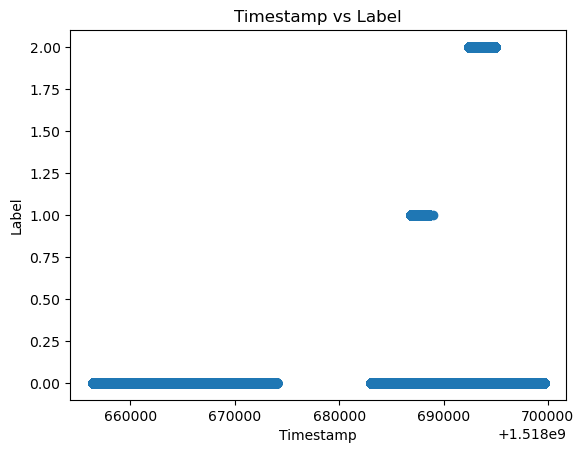

In [80]:
# create scatterplot graph with df_obj
import matplotlib.pyplot as plt

plt.scatter(df_obj['Timestamp'], df_obj['Label'])
plt.xlabel('Timestamp')
plt.ylabel('Label')
plt.title('Timestamp vs Label')
plt.show()

### 3.0 Data Modelling

In [81]:
# create a neural network using pytorch to predict the Label column with 3 categorical values: 0, 1, 2
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# convert df_selected to a tensor
X = torch.tensor(df_selected.values, dtype=torch.float)

# convert df_label to a tensor
y = torch.tensor(df_label.values, dtype=torch.long)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### 3.1 NN with Leaky ReLu

In [82]:
# Create a neural network model with LeakyReLU
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(35, 64)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 3)
        self.leaky_relu = nn.LeakyReLU(0.1)  # LeakyReLU with slope 0.1

    def forward(self, x):
        x = self.leaky_relu(self.fc1(x))
        x = self.leaky_relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Example usage:
model = NeuralNetwork()

In [83]:
# define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [84]:
# train the model
epochs = 200
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

Epoch 1/200, Loss: 1.135718822479248
Epoch 11/200, Loss: 0.8852017521858215
Epoch 21/200, Loss: 0.5701375007629395
Epoch 31/200, Loss: 0.2955411672592163
Epoch 41/200, Loss: 0.24019652605056763
Epoch 51/200, Loss: 0.22841031849384308
Epoch 61/200, Loss: 0.205900639295578
Epoch 71/200, Loss: 0.19239073991775513
Epoch 81/200, Loss: 0.18169693648815155
Epoch 91/200, Loss: 0.17145827412605286
Epoch 101/200, Loss: 0.16248129308223724
Epoch 111/200, Loss: 0.15396255254745483
Epoch 121/200, Loss: 0.14538927376270294
Epoch 131/200, Loss: 0.13670919835567474
Epoch 141/200, Loss: 0.12785685062408447
Epoch 151/200, Loss: 0.11887195706367493
Epoch 161/200, Loss: 0.10990094393491745
Epoch 171/200, Loss: 0.10072094202041626
Epoch 181/200, Loss: 0.09150465577840805
Epoch 191/200, Loss: 0.08230042457580566


In [85]:
# make predictions
with torch.no_grad():
    output = model(X_test)
    _, predicted = torch.max(output, 1)

# calculate accuracy
accuracy = accuracy_score(y_test, predicted)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.98


#### 3.2 NN with ReLu

In [86]:
# convert df_selected to a tensor
X = torch.tensor(df_selected.values, dtype=torch.float)

# convert df_label to a tensor
y = torch.tensor(df_label.values, dtype=torch.long)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
# create a neural network model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(35, 64)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
model = NeuralNetwork()

In [88]:
# define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [89]:
# train the model
epochs = 200
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

Epoch 1/200, Loss: 1.0428756475448608
Epoch 11/200, Loss: 0.7577027678489685
Epoch 21/200, Loss: 0.46758541464805603
Epoch 31/200, Loss: 0.27053964138031006
Epoch 41/200, Loss: 0.23411622643470764
Epoch 51/200, Loss: 0.21664570271968842
Epoch 61/200, Loss: 0.19603317975997925
Epoch 71/200, Loss: 0.18236546218395233
Epoch 81/200, Loss: 0.16997374594211578
Epoch 91/200, Loss: 0.15733152627944946
Epoch 101/200, Loss: 0.14438974857330322
Epoch 111/200, Loss: 0.13093112409114838
Epoch 121/200, Loss: 0.11819780617952347
Epoch 131/200, Loss: 0.10626162588596344
Epoch 141/200, Loss: 0.09500865638256073
Epoch 151/200, Loss: 0.08438321202993393
Epoch 161/200, Loss: 0.0738668441772461
Epoch 171/200, Loss: 0.06361623853445053
Epoch 181/200, Loss: 0.05410606041550636
Epoch 191/200, Loss: 0.04547547176480293


In [91]:
# make predictions
with torch.no_grad():
    output = model(X_test)
    _, predicted = torch.max(output, 1)

# calculate accuracy
accuracy = accuracy_score(y_test, predicted)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9895


### 4.0 Archived cells

Check correlation between df_int and df_float.

/opt/anaconda3/envs/githubcopilotworkshop/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

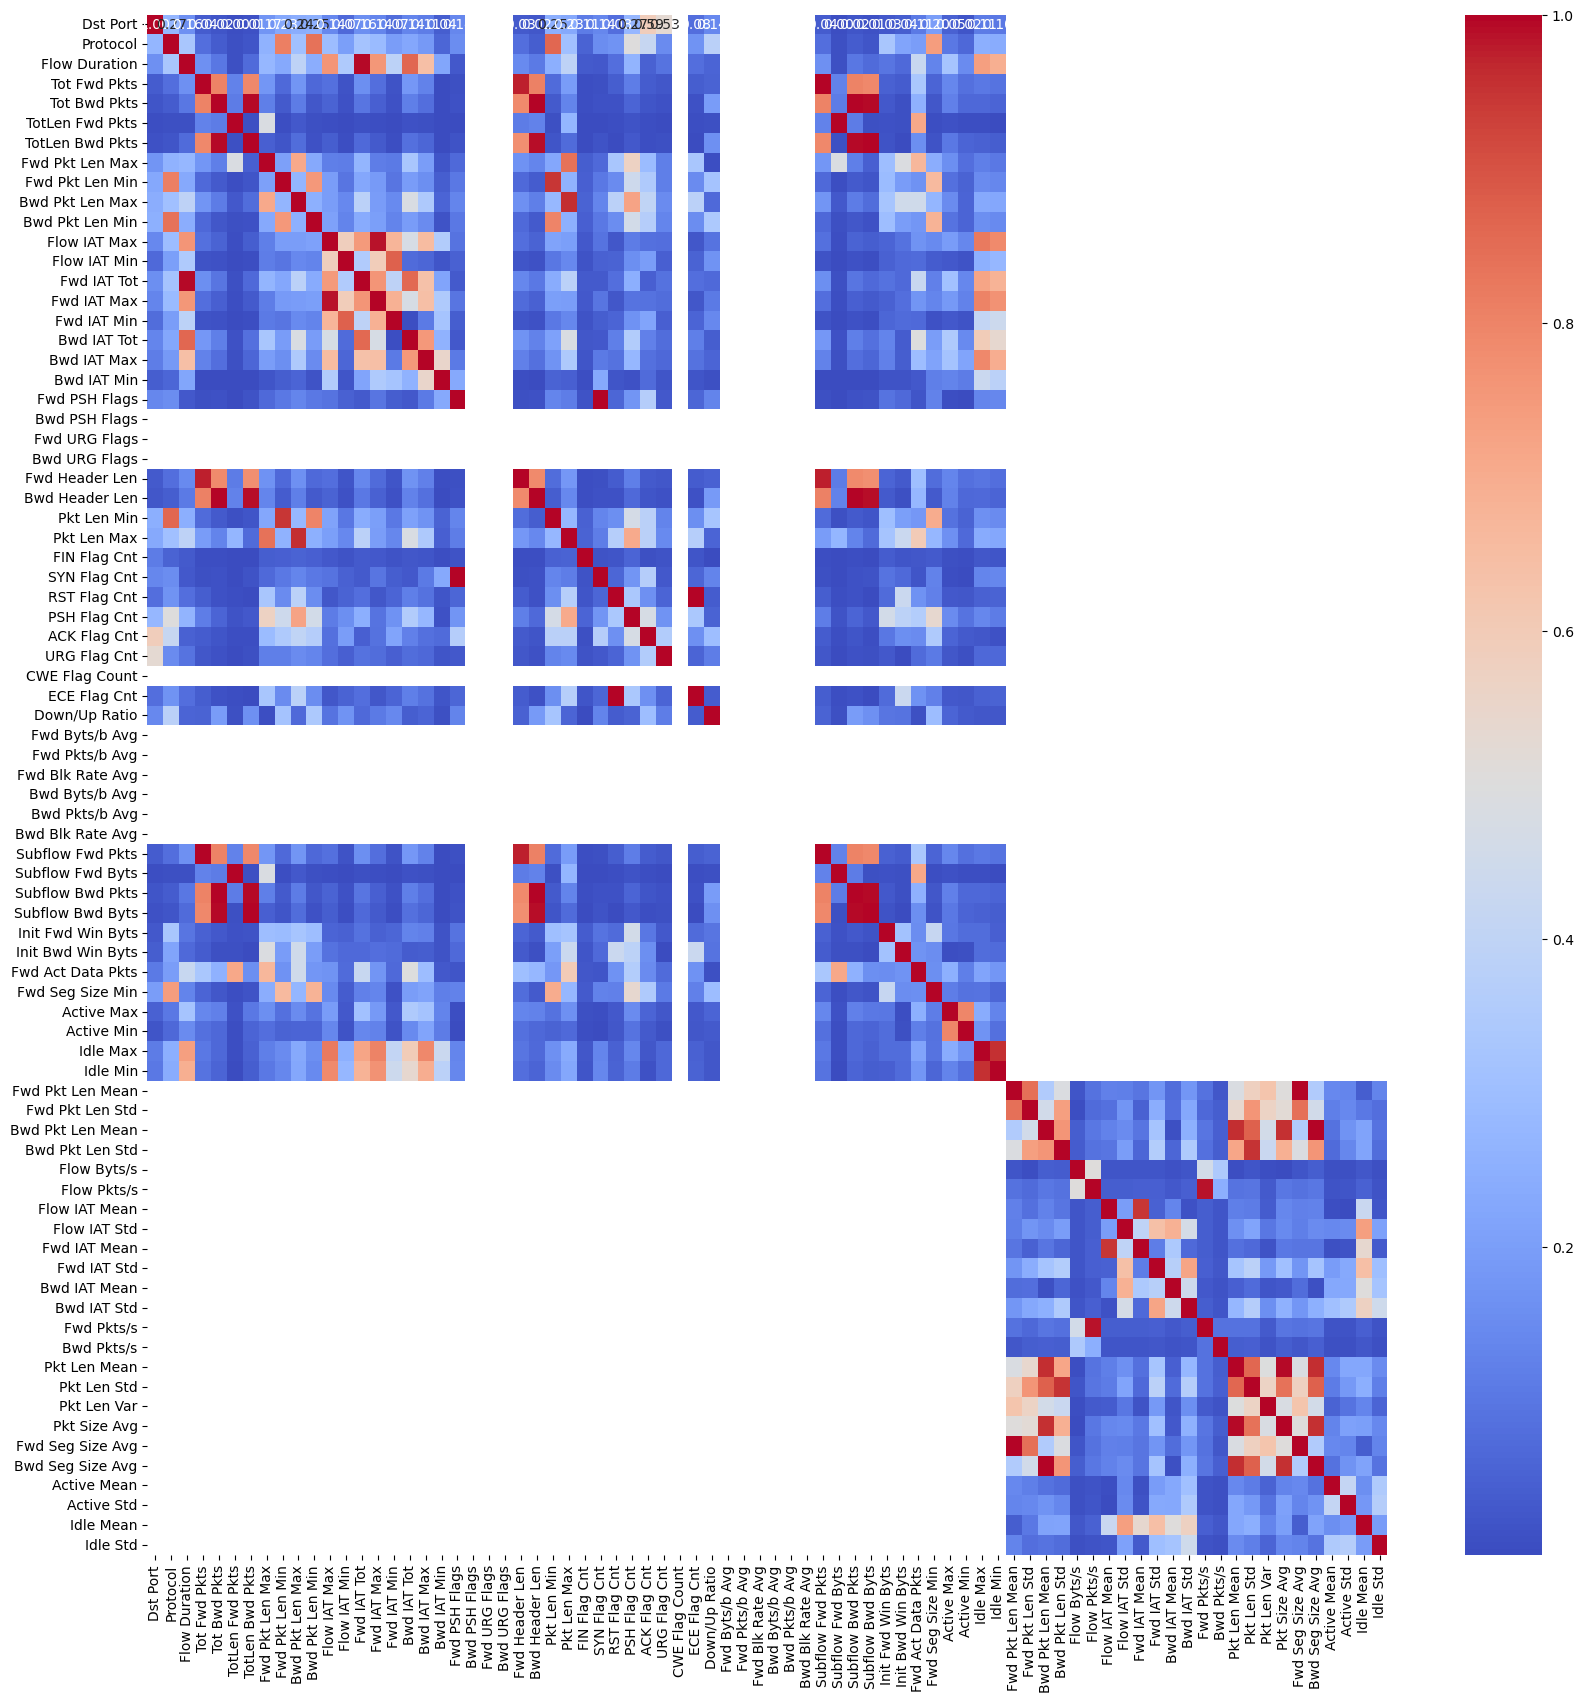

In [ ]:
# append df_int and df_float
df_num = pd.concat([df_int, df_float])

# create graphical correlation matrix for df_num
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 20))
sns.heatmap(df_num.corr().abs(), annot=True, fmt='.2f', cmap='coolwarm')


/opt/anaconda3/envs/githubcopilotworkshop/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

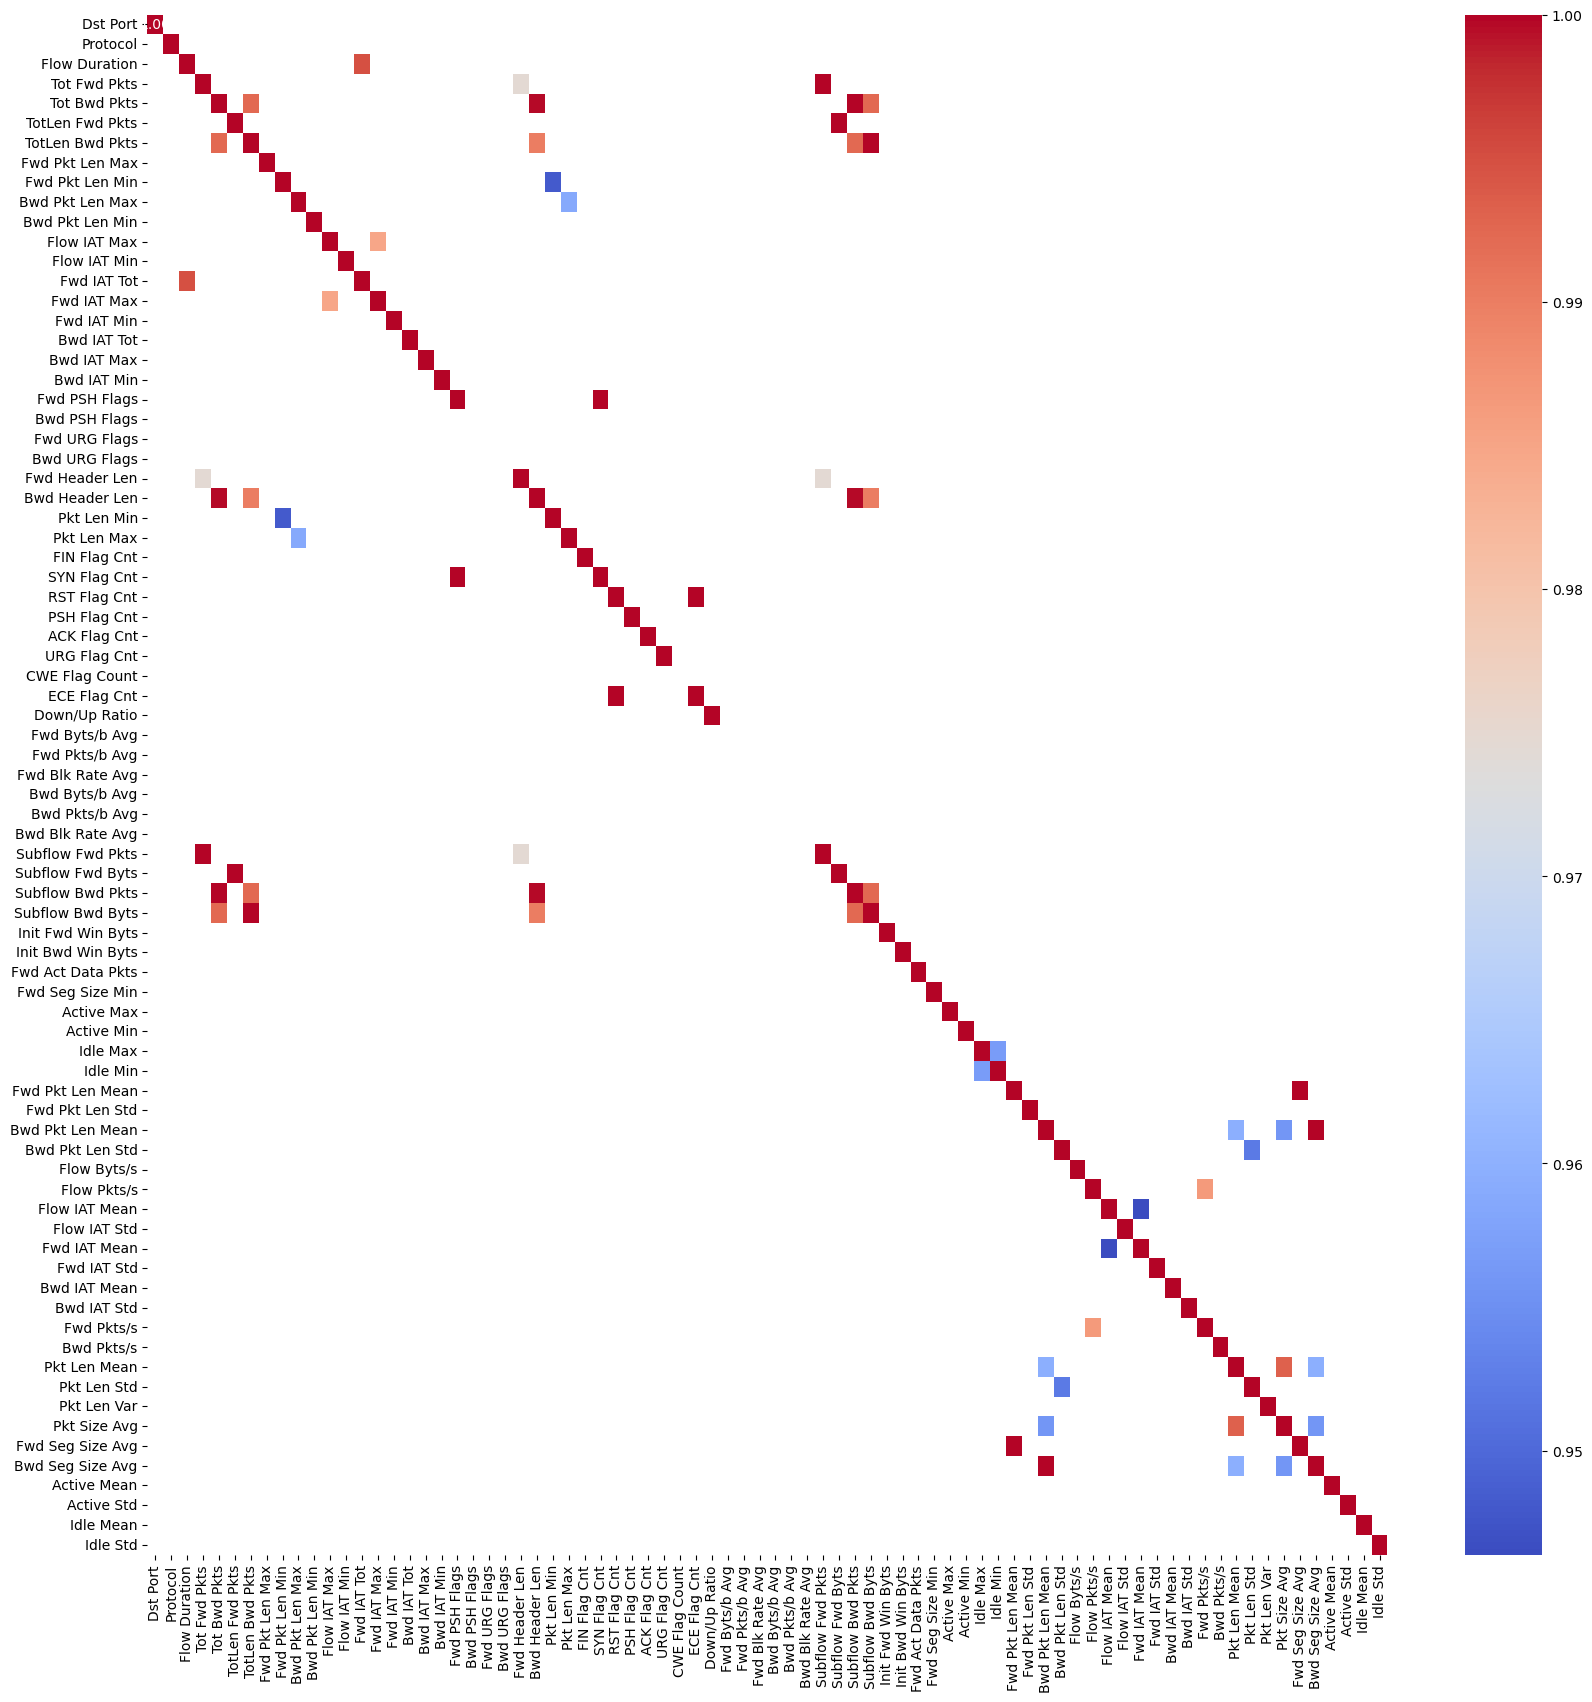

In [ ]:
# show heatmap of correlations above 0.9
plt.figure(figsize=(20, 20))
sns.heatmap(df_num.corr().abs()[df_num.corr() > 0.9], annot=True, fmt='.2f', cmap='coolwarm')


In [ ]:
# list the pairs of columns with correlation above 0.9 and their correlation values. Do not include 1.0 correlations
correlation_matrix = df_num.corr().abs()
correlation_matrix = correlation_matrix[correlation_matrix > 0.9]
correlation_matrix = correlation_matrix[correlation_matrix < 1.0]
correlation_matrix.dropna(axis=0, how='all', inplace=True)
correlation_matrix.dropna(axis=1, how='all', inplace=True)
correlation_matrix = correlation_matrix.stack().reset_index()


In [ ]:
correlation_matrix.sort_values(by=0, ascending=False)

,level_0,level_1,0
22,ECE Flag Cnt,RST Flag Cnt,0.999983
21,RST Flag Cnt,ECE Flag Cnt,0.999983
3,Tot Bwd Pkts,Bwd Header Len,0.999750
25,Subflow Bwd Pkts,Bwd Header Len,0.999750
17,Bwd Header Len,Subflow Bwd Pkts,0.999750
15,Bwd Header Len,Tot Bwd Pkts,0.999750
0,Flow Duration,Fwd IAT Tot,0.994912
11,Fwd IAT Tot,Flow Duration,0.994912
44,Pkt Size Avg,Pkt Len Mean,0.993283
40,Pkt Len Mean,Pkt Size Avg,0.993283


In [ ]:
# list the unique column pairs. Such that if (A, B) is listed, (B, A) should not be listed
correlation_matrix['pairs'] = correlation_matrix[['level_0', 'level_1']].apply(frozenset, axis=1)
correlation_matrix.drop_duplicates(subset='pairs', inplace=True)
correlation_matrix.drop(columns='pairs', inplace=True)
correlation_matrix.sort_values(by=0, ascending=False)

,level_0,level_1,0
22,ECE Flag Cnt,RST Flag Cnt,0.999983
15,Bwd Header Len,Tot Bwd Pkts,0.999750
17,Bwd Header Len,Subflow Bwd Pkts,0.999750
0,Flow Duration,Fwd IAT Tot,0.994912
40,Pkt Len Mean,Pkt Size Avg,0.993283
24,Subflow Bwd Pkts,TotLen Bwd Pkts,0.992394
2,Tot Bwd Pkts,TotLen Bwd Pkts,0.992394
27,Subflow Bwd Byts,Tot Bwd Pkts,0.992394
29,Subflow Bwd Byts,Subflow Bwd Pkts,0.992394
16,Bwd Header Len,TotLen Bwd Pkts,0.990078


In [ ]:
# show correlation between Tot Bwd Pkts and Subflow Bwd Pkts
df[['Tot Bwd Pkts', 'Subflow Bwd Pkts']].corr()

,Tot Bwd Pkts,Subflow Bwd Pkts
Tot Bwd Pkts,1.0,1.0
Subflow Bwd Pkts,1.0,1.0


In [ ]:
# drop columns 'Tot Bwd Pkts', 'Subflow Bwd Pkts', 'Subflow Fwd Pkts', 

In [ ]:
# list columns in level_0 that appear more than once
value_counts = correlation_matrix['level_0'].value_counts()

# Sort the value counts in descending order
sorted_value_counts = value_counts.sort_values(ascending=False)

# Filter to show only those values greater than 1
filtered_value_counts = sorted_value_counts[sorted_value_counts > 1]
filtered_value_counts


level_0
Bwd Header Len      4
Fwd Header Len      2
Bwd Pkt Len Mean    2
Subflow Bwd Byts    2
Bwd Seg Size Avg    2
Name: count, dtype: int64

In [ ]:
# list columns in level_1 that appear more than once
value_counts = correlation_matrix['level_1'].value_counts()

# Sort the value counts in descending order
sorted_value_counts = value_counts.sort_values(ascending=False)

# Filter to show only those values greater than 1
filtered_value_counts = sorted_value_counts[sorted_value_counts > 1]
filtered_value_counts


level_1
Pkt Size Avg        3
TotLen Bwd Pkts     3
Subflow Bwd Pkts    2
Pkt Len Mean        2
Tot Bwd Pkts        2
Name: count, dtype: int64

In [ ]:
# list columns that overlap in level_0 and level_1
level_0 = correlation_matrix['level_0'].value_counts()
level_1 = correlation_matrix['level_1'].value_counts()

overlap = level_0[level_0.index.isin(level_1.index)]
overlap

level_0
Subflow Bwd Byts    2
Pkt Len Mean        1
Tot Bwd Pkts        1
Subflow Bwd Pkts    1
Name: count, dtype: int64

In [ ]:
# show the unique columns in the correlation matrix
correlation_matrix['level_0'].unique()

array(['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Bwd Pkts',
       'Fwd Pkt Len Min', 'Bwd Pkt Len Max', 'Flow IAT Max',
       'Fwd IAT Tot', 'Fwd IAT Max', 'Fwd Header Len', 'Bwd Header Len',
       'Pkt Len Min', 'Pkt Len Max', 'RST Flag Cnt', 'ECE Flag Cnt',
       'Subflow Fwd Pkts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
       'Idle Max', 'Idle Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std',
       'Flow Pkts/s', 'Flow IAT Mean', 'Fwd IAT Mean', 'Fwd Pkts/s',
       'Pkt Len Mean', 'Pkt Len Std', 'Pkt Size Avg', 'Bwd Seg Size Avg'],
      dtype=object)

In [ ]:
correlation_matrix['level_0'].unique().shape[0]

30

In [ ]:
# show columns with either "Min", "Max" in their names
min = df_num.filter(like='Min').columns
min

Index(['Fwd Pkt Len Min', 'Bwd Pkt Len Min', 'Flow IAT Min', 'Fwd IAT Min',
       'Bwd IAT Min', 'Pkt Len Min', 'Fwd Seg Size Min', 'Active Min',
       'Idle Min'],
      dtype='object')

In [ ]:
max = df_num.filter(like='Max').columns
max

Index(['Fwd Pkt Len Max', 'Bwd Pkt Len Max', 'Flow IAT Max', 'Fwd IAT Max',
       'Bwd IAT Max', 'Pkt Len Max', 'Active Max', 'Idle Max'],
      dtype='object')

In [ ]:
avg = df_num.filter(like='Avg').columns
avg

Index(['Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg'], dtype='object')

In [ ]:
mean = df_num.filter(like='Mean').columns
mean

Index(['Fwd Pkt Len Mean', 'Bwd Pkt Len Mean', 'Flow IAT Mean', 'Fwd IAT Mean',
       'Bwd IAT Mean', 'Pkt Len Mean', 'Active Mean', 'Idle Mean'],
      dtype='object')

In [ ]:
std = df_num.filter(like='Std').columns
std

Index(['Fwd Pkt Len Std', 'Bwd Pkt Len Std', 'Flow IAT Std', 'Fwd IAT Std',
       'Bwd IAT Std', 'Pkt Len Std', 'Active Std', 'Idle Std'],
      dtype='object')

In [ ]:
# sort the min, max, and mean columns alphabetically
min = min.sort_values()
max = max.sort_values()
mean = mean.sort_values()

# convert 'min', 'max', and 'mean' to Series objects
min = pd.Series(min)
max = pd.Series(max)
mean = pd.Series(mean)

# show the sorted columns side by side
pd.concat([min, max, mean], axis=1)

,0,1,2
0,Active Min,Active Max,Active Mean
1,Bwd IAT Min,Bwd IAT Max,Bwd IAT Mean
2,Bwd Pkt Len Min,Bwd Pkt Len Max,Bwd Pkt Len Mean
3,Flow IAT Min,Flow IAT Max,Flow IAT Mean
4,Fwd IAT Min,Fwd IAT Max,Fwd IAT Mean
5,Fwd Pkt Len Min,Fwd Pkt Len Max,Fwd Pkt Len Mean
6,Fwd Seg Size Min,Idle Max,Idle Mean
7,Idle Min,Pkt Len Max,Pkt Len Mean
8,Pkt Len Min,NaN,NaN


In [ ]:
# sort the std columns alphabetically
std = std.sort_values()

# convert 'std' to a Series object
std = pd.Series(std)

# show std and mean columns side by side
pd.concat([std, mean], axis=1)

,0,1
0,Active Std,Active Mean
1,Bwd IAT Std,Bwd IAT Mean
2,Bwd Pkt Len Std,Bwd Pkt Len Mean
3,Flow IAT Std,Flow IAT Mean
4,Fwd IAT Std,Fwd IAT Mean
5,Fwd Pkt Len Std,Fwd Pkt Len Mean
6,Idle Std,Idle Mean
7,Pkt Len Std,Pkt Len Mean


In [ ]:
# store the column values in std and mean columns
std = df_num.filter(like='Std')
mean = df_num.filter(like='Mean')


In [ ]:
std.head()

,Fwd Pkt Len Std,Bwd Pkt Len Std,Flow IAT Std,Fwd IAT Std,Bwd IAT Std,Pkt Len Std,Active Std,Idle Std
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# create a dataframe of the std and mean columns
df_std_mean = df_num[std]
df_std_mean = df_std_mean.join(df_num[mean])

df_std_mean.head()

ValueError: Boolean array expected for the condition, not object

In [ ]:
# show number of null values in the std and mean columns
df_std_mean.isnull().sum().sort_values(ascending=False)

Active Std          2092308
Bwd IAT Std         2092308
Bwd Pkt Len Std     2092308
Flow IAT Std        2092308
Fwd IAT Std         2092308
Fwd Pkt Len Std     2092308
Idle Std            2092308
Pkt Len Std         2092308
Active Mean         2092308
Bwd IAT Mean        2092308
Bwd Pkt Len Mean    2092308
Flow IAT Mean       2092308
Fwd IAT Mean        2092308
Fwd Pkt Len Mean    2092308
Idle Mean           2092308
Pkt Len Mean        2092308
dtype: int64